<a href="https://colab.research.google.com/github/kpjaskie/SenSIP21/blob/main/3_ML_Algorithms_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means CLustering
The K-Means clustering algorithm is an **unsupervised** learning algorithm that finds underlying structure in unlabeled data.  In this workbook, we will explore the K-means algorithm and use it to cluster data in provided datasets.

While the implementation of a basic K-Means algorithm is not difficult (and we will explore it as well in this notebook), we can find built-in algorithms using the Scikit-Learn library.  This is what we will start with.


In [1]:
# First, we need to import the relavent libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Before we can apply K-means, we need a dataset to apply it to.  Later we will use some real-world datasets, but for now we can generate a random dataset composed of random "blobs" or clusters of data.  

Notice that while the vertical axis is often labeled *y* in mathematics, in Machine Learning *y* typically represents the data label.  The data is typically stored entirely in *X*, which is commonly a matrix with multiple columns.  In this case, we are creating two-dimensional data, so *X* has two columns.  Here, *y* is a single vector containing 0's, 1's, and 2's representing which blob each datapoint belongs to.  We will in fact be estimating this *y* during this problem.

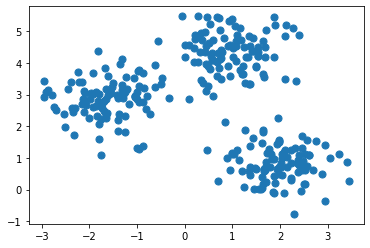

In [63]:
#@title Generate random data
from sklearn.datasets import make_blobs

Dataset_Size = 300 #@param {type:"slider", min:50, max:1000, step:10}
Number_of_Clusters = 3 #@param {type:"slider", min:0, max: 5, step:1}
Standard_Deviation = 0.6 #@param {type:"slider", min:0, max:2, step:0.1}
Random_Seed = 0 #@param {type:"integer"}
#@markdown Different clusters can be obtained using different random seeds.

#If you remove the random_state=0, it will create random clusters
X, y = make_blobs(n_samples=Dataset_Size, 
                  centers=Number_of_Clusters, 
                  cluster_std=Standard_Deviation, 
                  random_state=Random_Seed) 

plt.scatter(X[:, 0], X[:, 1], s=50)

Once we have our data (stored in variable X), we can apply the built-in Scikit-Learn K-means algorithm.  Since we can see that there are three clusters in the data, we will tell the K-means algorithm to find 3 clusters.  The number of clusters the K-means algorithm looks for is a **hyperparameter**.  Here, I'm telling the algorithm to choose three random points for my initial cluster centroids.



*   The `centroids` variable returns the mean value for each cluster. In this case, there will be three centroids.
*   Notice here that I've stored the calculated cluster labels in a variable called `y_hat`.  We typically label variable estimates with a hat:

$$Estimate\space of\space y = \hat{y}$$

*   The returned `cost` is also sometimes called the inertia.  This is the sum of squares of the distance of each datapoint to its cluster centroid.  

$$cost=arg\space \min_{C} \sum_{c=1}^{k} \sum_{i\in c} ||x_i-\mu_c||^2 $$



In [64]:
#@title K-Means Clustering using sklearn
from sklearn.cluster import k_means

# Perform k-means clustering
centroids, y_hat, cost = k_means(X, n_clusters=3)

# Print output
print('\nCentroids = \n', centroids)
print('\nFirst couple y_hat = ', y_hat[:10])
print('\nCost = ', cost)


Centroids = 
 [[-1.60811992  2.85881658]
 [ 1.95159369  0.83467497]
 [ 0.95625704  4.37226546]]

First couple y_hat =  [2 1 2 0 0 0 1 2 0 0]

Cost =  212.35550348922897


Once we've applied the algorithm, we can plot the resulting clusters and their centroids.

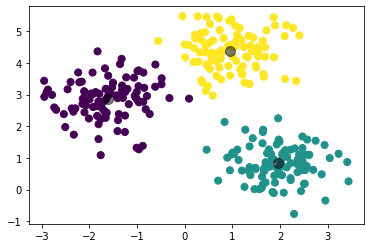

In [65]:
#@title Plot the labeled clusters
plt.scatter(X[:, 0], X[:, 1], 
            c=y_hat, s=50) #here the color is based on y_hat

# Plot the centroids
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            c='black', 
            s=100, 
            alpha=0.5)  #This is the level of transparency

Congratulations!  You've performed your first K-Means clustering algorithm.  

# Hyperparameter Tuning

Notice that we told the k-means algorithm to use 3 clusters, because that is what we ourselves can see.  In a more complex problem, this will not be possible.  We would like to *tune* this **hyperparameter** to identify the best possible value even when we are unable to visualize the clusters ourselves.

To do this, we want to try several possible numbers of clusters and plot the cost per clustering.

In [66]:
cluster_nums = np.arange(start=2, stop=10)
cluster_nums

array([2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Cost')

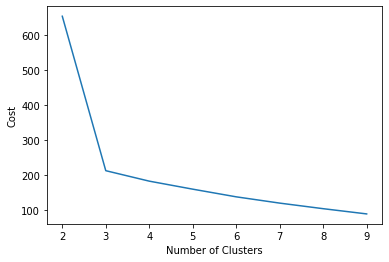

In [67]:
#@title Create a Cost Plot
costs = np.empty_like(cluster_nums) #starts at 0

for c in cluster_nums:
    centroids, y_hat, cost = k_means(X, n_clusters=c)
    costs[c-2] = cost #store value into appropriate index

plt.plot(cluster_nums, costs)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')

As we can see from this plot, there is a distinct *elbow* at 3 clusters.  This elbow point indicates the "inherant" number of clusters in the data.  

Sometimes there won't be an elbow.  This can happen if the data is continuous and not inherantly broken into clusters.  Clustering in this situation can still be useful, though the user must choose the number of clusters based on their interests. 

## Give it a Try:
Try changning the number of clusters and the standard deviation of each cluster in the generated data to see how this changes. You'll notice that if your data has a high enough standard deviation to start overlapping, this plot will start to have a less obvious elbow in it.

# How the K-Means Algorithm Works
Since the K-means algorithm is so simple, we will also provide it here.  It will allow us to see the steps of the algorithm.

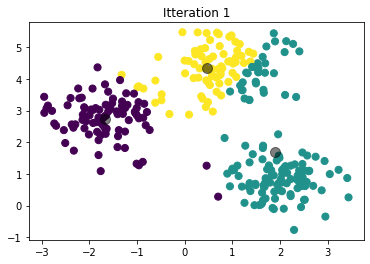

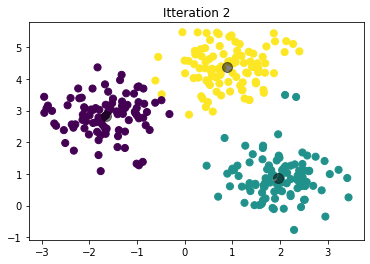

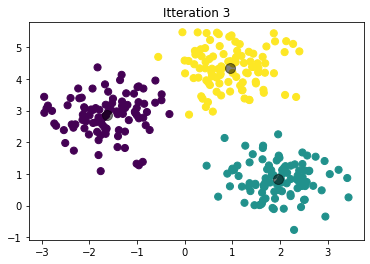

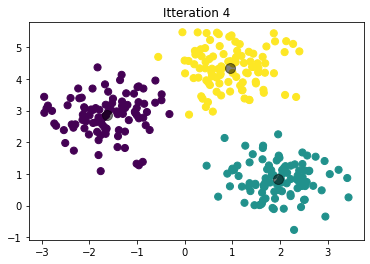

In [69]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2, disp_steps=True):
    # Randomly choose initialization clusters
    rng = np.random.RandomState(rseed)
    init_centroids = rng.permutation(X.shape[0])[:n_clusters]
    centroids = X[init_centroids]
    
    still_running = True
    itteration = 1
    while still_running == True:
        # Assign labels based on closest centroid
        labels = pairwise_distances_argmin(X, centroids)
        
        # Find new centroids from means of points
        new_centroids = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            still_running = False
        centroids = new_centroids

        if disp_steps == True:
            plt.figure(itteration-1)
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
            plt.title('Itteration ' + str(itteration))
            plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.5)

        itteration = itteration + 1

    return centroids, labels

#Call the find_clusters algorithm to see what's happening 
centroids, labels = find_clusters(X, 3)

#Optimality
It is important to know that the K-means algorithm is not guarenteed to produce the *optimal* clustering (the clustering with the lowest cost).  Each step will always produce a *better* clustering, but it is possible for the algorithm to end at what is called a *local optimum* rather than a *global optimum*.

To handle this situation, it is common to run the K-means algorithm from several different initial starting locations.  The Scikit-Learn k_means function defaults to choosing 10 different random initial starting locations and choosing the solution that has the lowest cost.

Below, we show an example where our k-means implementation gets stuck in a local optimum.

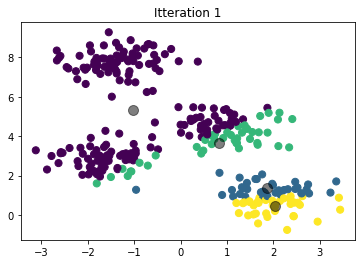

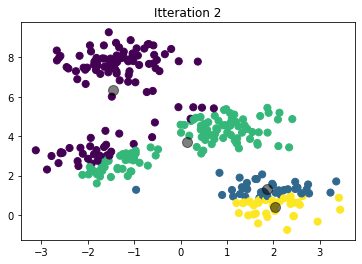

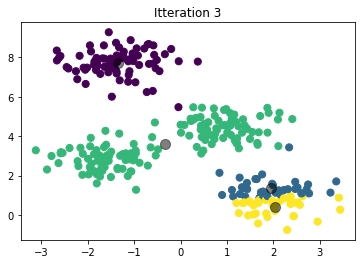

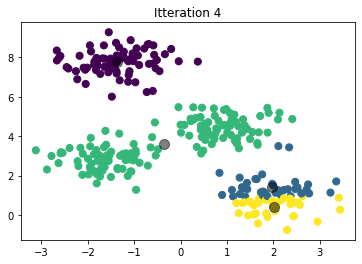

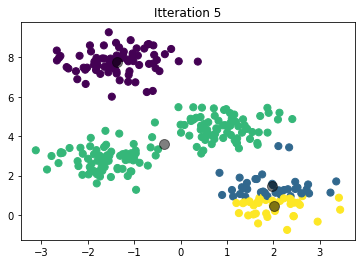

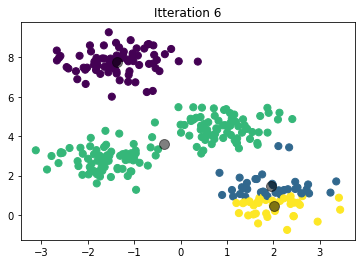

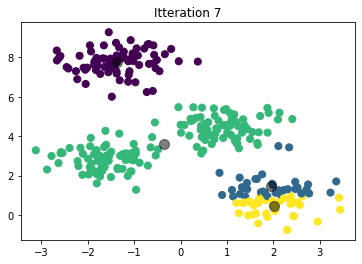

In [70]:
#@title Example of a non-optimal k-means solution
X, y = make_blobs(n_samples=300, 
                  centers=4, 
                  cluster_std=0.60, 
                  random_state=0)

centroids, labels = find_clusters(X, 4, rseed=0)

#Linearity

You may have noticed that K-means divides the plane up linearly - the boundaries between clusters being straight lines.  This means that more complex, non-linear clusters may not be clustered properly.

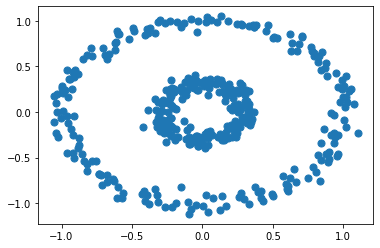

In [72]:
#@title Generate Non-Linear Data
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, 
                    factor=.3, 
                    noise=.05) #With no noise, this will 
                               #generate a perfect circle

plt.scatter(X[:, 0], X[:, 1], s=50)

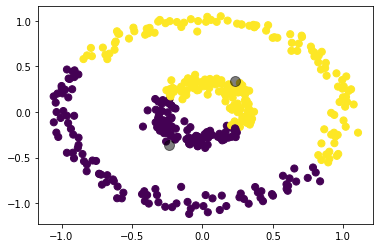

In [73]:
#@title Apply K-Means to Non-Linear Data
centroids, y_hat, cost = k_means(X, n_clusters=2)

# plot the result
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=50) 
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', s=100, alpha=0.5)

To deal with this situation, a more complex algorithm is needed.  One such algorithm is called **Spectral Clustering**.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


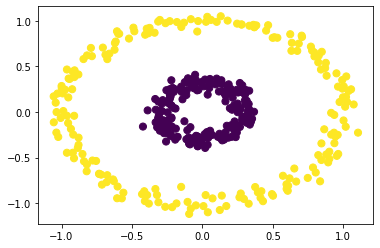

In [74]:
#@title Spectral Clustering
#@markdown Spectral Clustering creates a graph where data
#@markdown that is similar to one another is connected to one 
#@markdown another.  This can be done in many different ways.
#@markdown Here, we use a technique called 'Nearest Neighbors'.
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, 
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')

labels = model.fit_predict(X)

# plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50);

#K-Means for Image Compression

An interesting use of the K-means algorithm is compression (sound, image, etc...).  We can simplify something like an image that has millions of colors into one with many fewer colors with only a mild reduction in quality.  This is sometimes kown as quantization and is used in other areas such as speech compression as well.

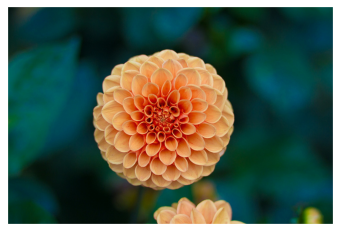

In [84]:
#@title Load Image
from sklearn.datasets import load_sample_image

Image_Choice = 'Flower' #@param ["Building", "Flower"]
if Image_Choice == 'Building':
    img = load_sample_image("china.jpg")
else:
    img = load_sample_image("flower.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

First, we need to reshape the data to be in the right format.  We're going to flatten it.  The data as given is in three dimensions - the x and y coordinates plus a third dimension for the color (containing the Red, Green, and Blue values).

In [85]:
img.shape

(427, 640, 3)

In [87]:
#@title Preprocess Image

# Here we're going to normalize the data
data = img / 255.0 # use 0...1 scale

# Then reshape it
data = data.reshape(img.shape[0] * img.shape[1], 3)
data.shape

(273280, 3)

Here we're going to use a variant of the K-means function we used above.  This MiniBatchKMeans is useful when the dataset is extremely large.  Optimization methods are used to speed up the run-time.

In [94]:
#@title Cluster Image
from sklearn.cluster import MiniBatchKMeans

#@markdown Compress the image into how many colors?
Num_Colors = 8 #@param {type:"integer"}

#Cluster
kmeans = MiniBatchKMeans(Num_Colors) #Useful when dataset is large
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

Once we have performed the K-means to segment the original 16 million colorspace into a smaller set (specified by num_colors above), we can now reconstruct our image using the smaller colorspace that we created using K-means.

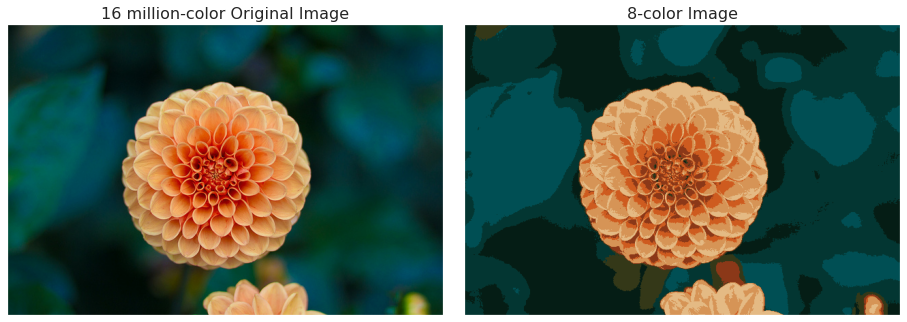

In [95]:
#@title Reconstruct image with fewer colors
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('16 million-color Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title(str(Num_Colors) + '-color Image', size=16);